In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

brest = load_breast_cancer()
df = pd.DataFrame(brest.data, columns=brest.feature_names)
df['diagnosis'] = brest.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values # 넘파이로 해야 하기 때문에 값만 가져옴
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify= y, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [455, 569]

# kFoldCrossData k겹 교차검증

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X = df.iloc[:, :-1].values # 넘파이로 해야 하기 때문에 값만 가져옴
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=1)


# 이해 필요

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression # 분류모델, 이름만 회귀임

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

cvscore = []
for i, (train, val) in enumerate(kfold):
    # 정규화
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train[train])
    X_val_sc = scaler.transform(X_train[val])
    
    # 차원축소
    pca = PCA(n_components=2)
    X_train_sc = pca.fit_transform(X_train_sc)
    X_val_sc = pca.transform(X_val_sc)

    # 모델학습, 검증
    model = LogisticRegression(solver='liblinear', random_state=1)
    model.fit(X_train_sc, y_train[train])
    # p_val = model.predict(X_val_sc)
    score = model.score(X_val_sc, y_train[val])
    cvscore.append(score)
    print(f'폴드{i+1}정확도 : {score}')
print('\n교자검증(CV) 정확도 : ', np.mean(cvscore))


폴드1정확도 : 1.0
폴드2정확도 : 0.9347826086956522
폴드3정확도 : 0.9130434782608695
폴드4정확도 : 0.9347826086956522
폴드5정확도 : 0.9782608695652174
폴드6정확도 : 0.9333333333333333
폴드7정확도 : 0.9333333333333333
폴드8정확도 : 0.9777777777777777
폴드9정확도 : 0.9555555555555556
폴드10정확도 : 0.9333333333333333

교자검증(CV) 정확도 :  0.9494202898550725


# 위의 코드를 함수로 하는 방법

# pipeline

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 순서대로
lr_pipe = make_pipeline(StandardScaler(), 
                        PCA(n_components=2), 
                        LogisticRegression(solver='liblinear', random_state=1))
# lr_pipe.fit(X_train, y_train)
# lr_pipe.predict(X_test)
cvscore = cross_val_score(estimator=lr_pipe, X=X_train, y=y_train, cv=10, n_jobs=-1) # cv 10조각(kfold)
print('\n교자검증(CV) 정확도 : ', np.mean(cvscore))
for i, j in enumerate(cvscore):
    print(f'{i+1}번 : {j}')


교자검증(CV) 정확도 :  0.945072463768116
1번 : 0.9782608695652174
2번 : 0.9347826086956522
3번 : 0.9565217391304348
4번 : 0.9347826086956522
5번 : 0.9130434782608695
6번 : 0.9555555555555556
7번 : 0.9333333333333333
8번 : 0.9555555555555556
9번 : 0.9333333333333333
10번 : 0.9555555555555556


# 수치적으로 과대적합이 된 것인지 아닌지 확인

# 학습곡선

In [45]:
from sklearn.model_selection import learning_curve

lr_pipe = make_pipeline(StandardScaler(), 
                        # PCA(n_components=2),  # l2 들어가서 안 써도 된다?
                        LogisticRegression(solver='liblinear', penalty='l2', random_state=1))

sizes, train_score, val_score = learning_curve(estimator=lr_pipe, X=X_train, y=y_train, 
                                               train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

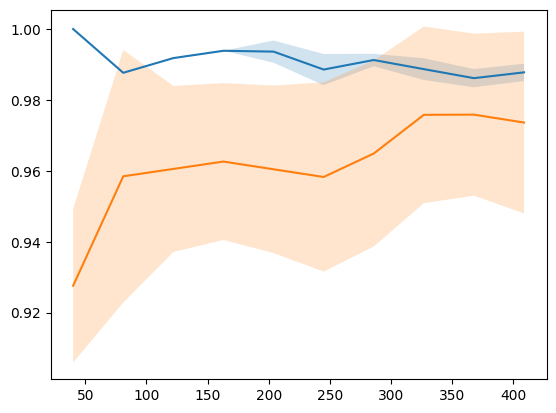

In [46]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
train_std = np.std(train_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure()
plt.plot(sizes, train_mean)
plt.fill_between(sizes, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(sizes, val_mean)
plt.fill_between(sizes, val_mean+val_std, val_mean-val_std, alpha=0.2)

plt.show()

# 검증곡선

In [47]:
from sklearn.model_selection import validation_curve

C_range = np.logspace(-3, 2, 6) # 10의 -3승부터 10의 2승까지
lr_pipe = make_pipeline(StandardScaler(), 
                        # PCA(n_components=2),  # l2 들어가서 안 써도 된다?
                        LogisticRegression(solver='liblinear', penalty='l2', random_state=1))

train_score, val_score = validation_curve(estimator=lr_pipe, X=X_train, y=y_train, 
                                        param_name='logisticregression__C', param_range=C_range, 
                                        cv=10, n_jobs=-1)

In [48]:
train_score.shape

(6, 10)

# 가장 적절한 파라미터 수치 찾기

# C가 0.1인게 가장 적절.
### 봉우리에서 꺾이는 부분

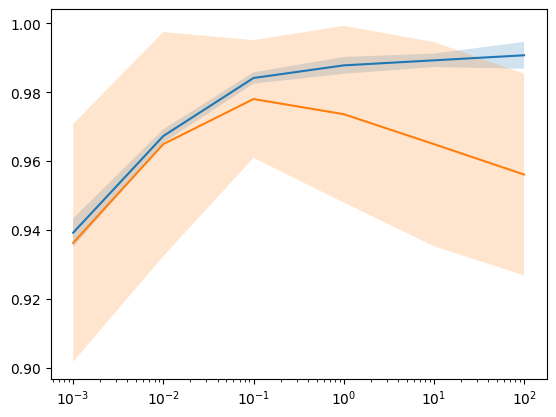

In [49]:
train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
train_std = np.std(train_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure()
plt.plot(C_range, train_mean)
plt.fill_between(C_range, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(C_range, val_mean)
plt.fill_between(C_range, val_mean+val_std, val_mean-val_std, alpha=0.2)

plt.xscale('log')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=1))
C_range = np.logspace(-4, 3, 8)
gamma_range = np.logspace(-4, 3, 8)
param_grid = [{'svc__C':C_range, 
               'svc__kernel':['linear']},
              {'svc__C':C_range, 
              'svc__gamma':gamma_range, 
              'svc__kernel':['rbf']}]

# 학습기만 생성됨
gs = GridSearchCV(estimator=svc_pipe, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [52]:
# 얘는 학습결과를 덮어써야 함.
gs = gs.fit(X_train, y_train)

In [53]:
gs.best_score_

0.9758454106280192

In [54]:
gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10.0, gamma=0.001, random_state=1))])

In [55]:
gs.best_params_

{'svc__C': 10.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

# 최적 모델 찾기

In [ ]:
# 서로 다른 모델들 간에 또 최적을 찾기
lr_gs = GridSearchCV(estimator=LogisticRegression, cv=2)
svc_gs = GridSearchCV(estimator=SVC)
forest_gs = 

lr_score = cross_val_score(estimator=lr_gs, cv=5)
svc_score = cross_val_score(estimator=svc_gs)
forest_score = cross_val_score(estimator=forest_gs)
# 위 세 개를 비교하면 된다.
# cv값을 조금 줄여주는 게 좋다. 곱해서 10이 되는 숫자로 나눈다